# Import Libraries

In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score, r2_score
from sklearn.linear_model import LogisticRegression

# Read Dataset

In [14]:
# Download the dataset that we choose from the kaggle web site and read the CSV file that contains all train data.

In [15]:
train=pd.read_csv('./train.csv')

In [16]:
# print head of train set 

In [17]:
train.head(2)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

# Clean DataSet
## 1. Columns 
( Replace dot --> Underscore) & (Strip white spaces)

In [18]:
## Replace - by _ underscore
## Remove whitespace by strip
## Make sure all are lower case
#print('----------------------------------------------------------')
#print('Before Replace dot with Underscore and Strip white spaces')
#print('----------------------------------------------------------')
#print(train.columns) # We observed we do not have dots 
#train.head(2)
train.columns = train.columns.str.replace('.', '_').str.strip()
print('----------------------------------------------------------')
print('After Replace dot with Underscore and Strip white spaces')
print('----------------------------------------------------------')
train.head(2)

----------------------------------------------------------
After Replace dot with Underscore and Strip white spaces
----------------------------------------------------------


battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  

[2 rows x 21 columns]

## 2. Rows 
(Check dtypes) & (Check for missing) & (check for duplicates) & (Check purpose column levels)

In [19]:
# ckeck data types of columns and we observied all types are numberic 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [20]:
#ckeck if there any missing values and result is (no missing vlaue)
train.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [21]:
#Check for duplicates
train.duplicated().sum()
#No duplicates found

0

In [22]:
train.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [23]:
#Check Categories for price_range
train.price_range.unique()

array([1, 2, 3, 0])

In [24]:
# we count the value of columns

# EDA

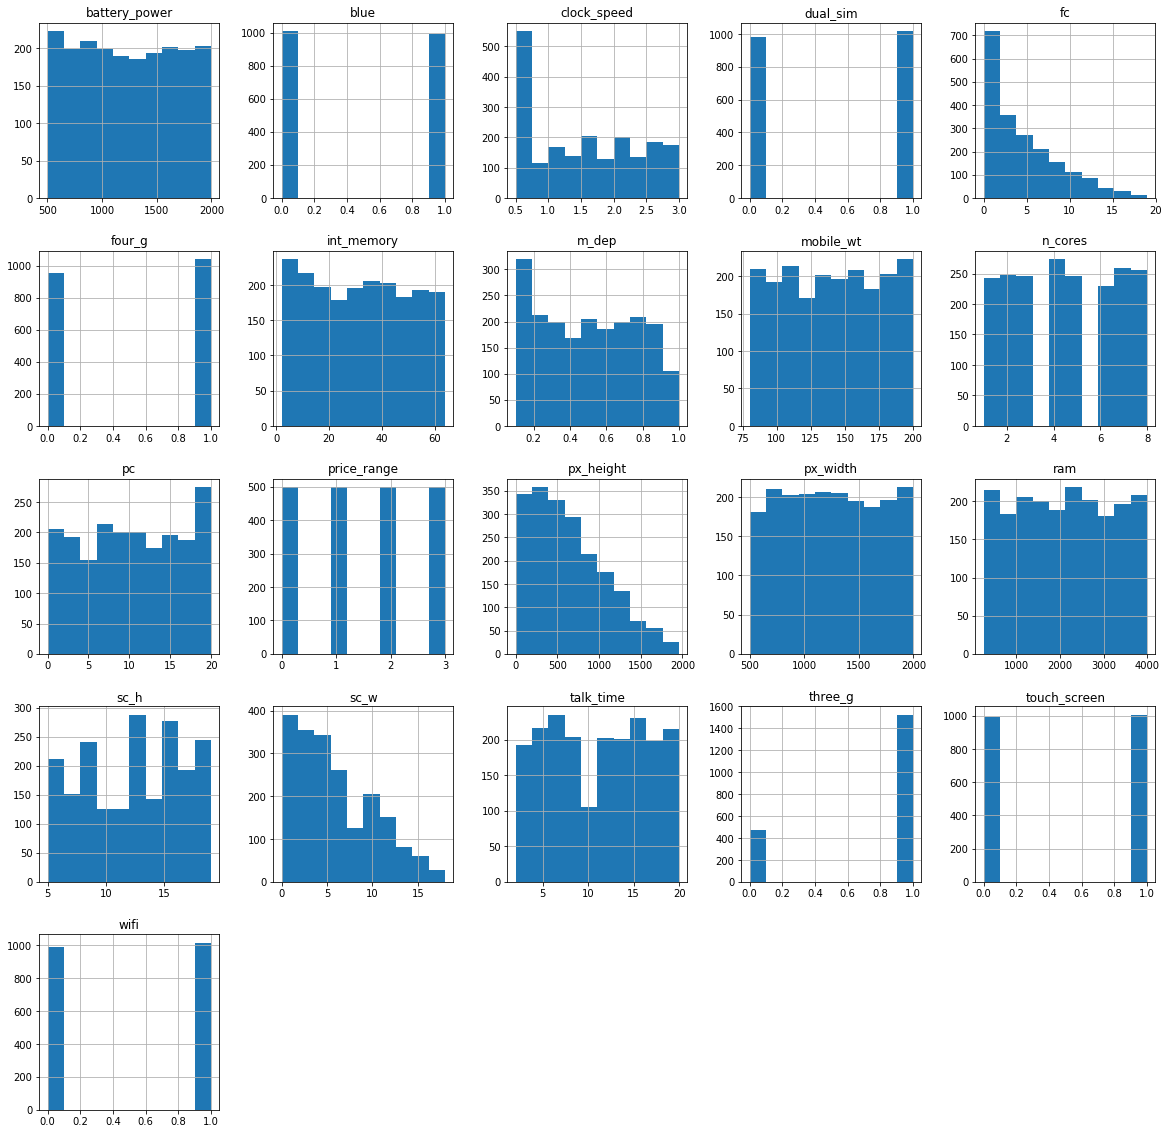

In [25]:
p = train.hist(figsize = (20,20))

##  A. Target

In [26]:
#Check purpose              
train.price_range.value_counts()

3    500
2    500
1    500
0    500
Name: price_range, dtype: int64

### BASED ON THE ABOVE, THE DATA IS BALANCED.

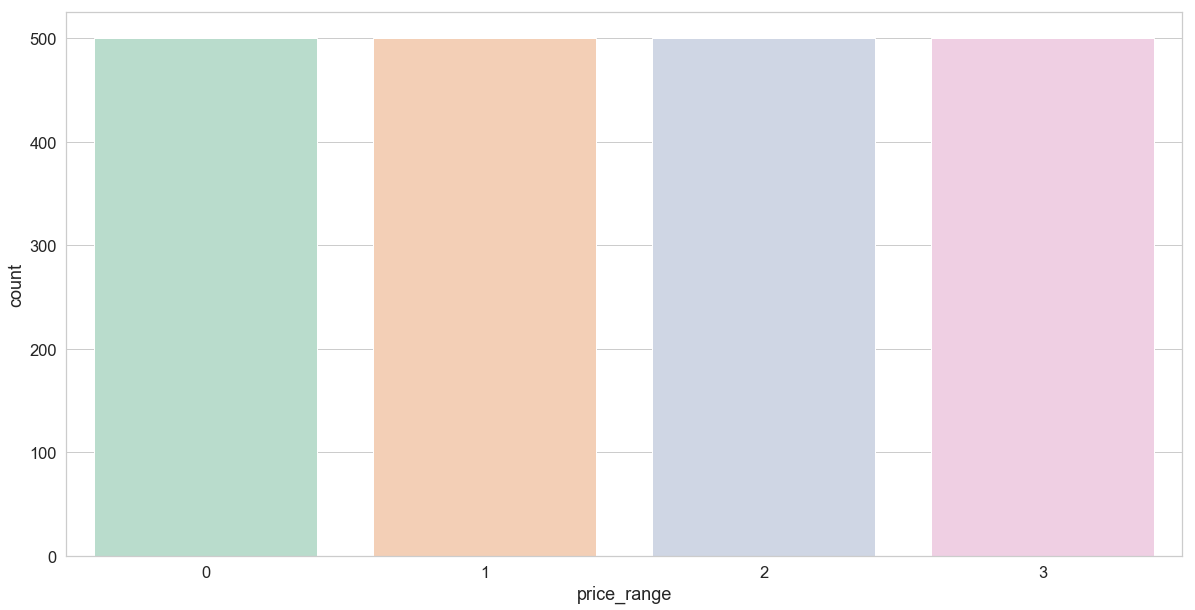

In [27]:
# 1-D Chart to check Target : --> Binary Classification (0,1)
figure = plt.figure(figsize=(20,10))
sns.set(style='whitegrid', palette = 'Pastel2', font_scale=1.5)
sns.countplot(x = train.price_range , data = train);

 ## B. Features (Numeric)

In [28]:
sns.pairplot(data = train);

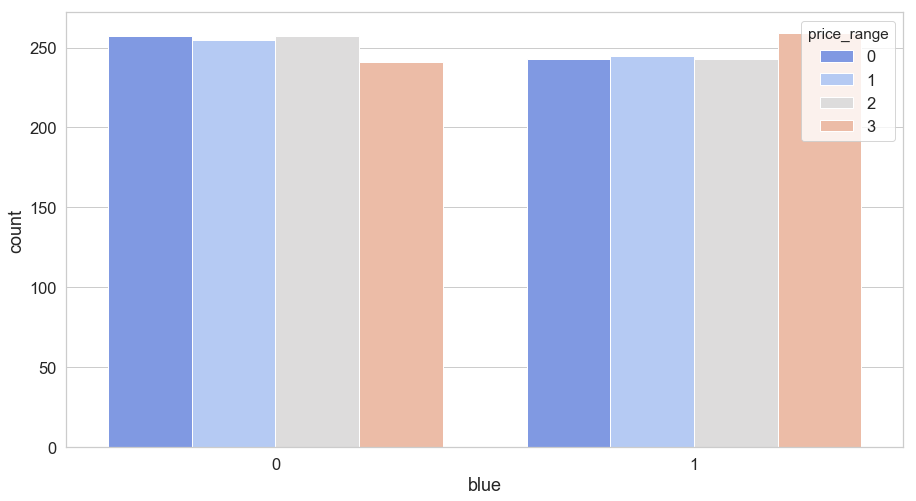

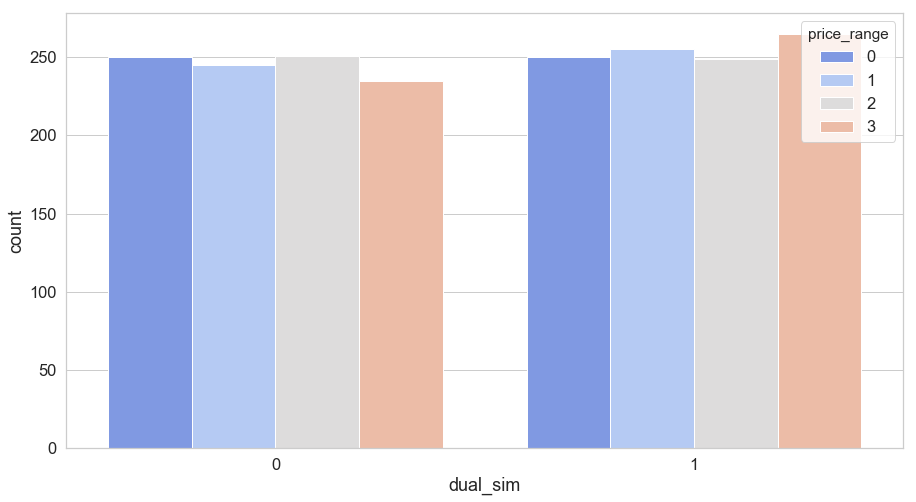

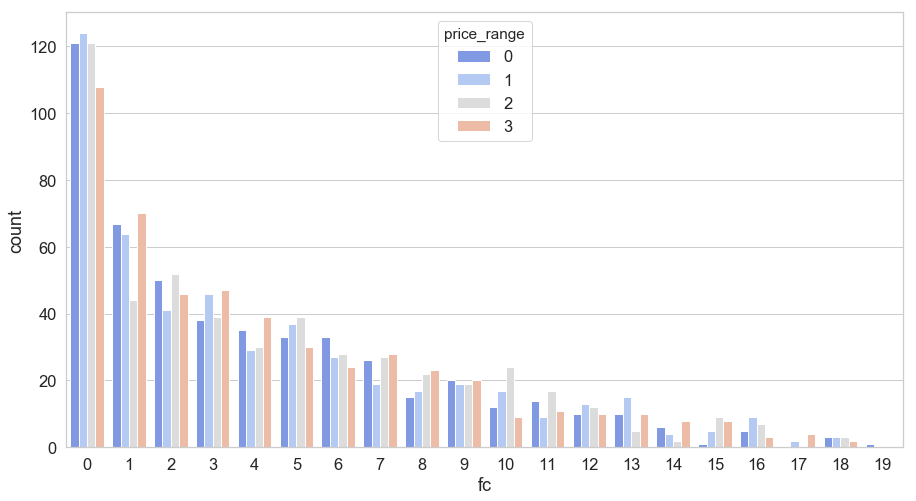

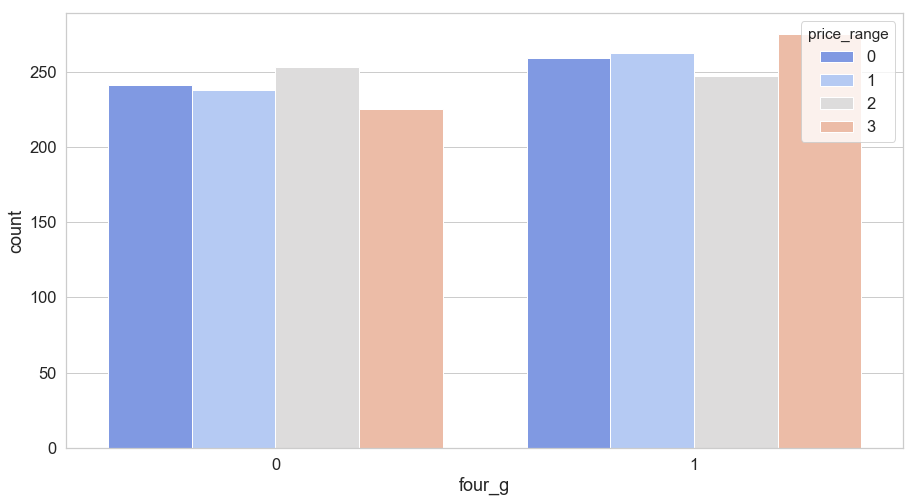

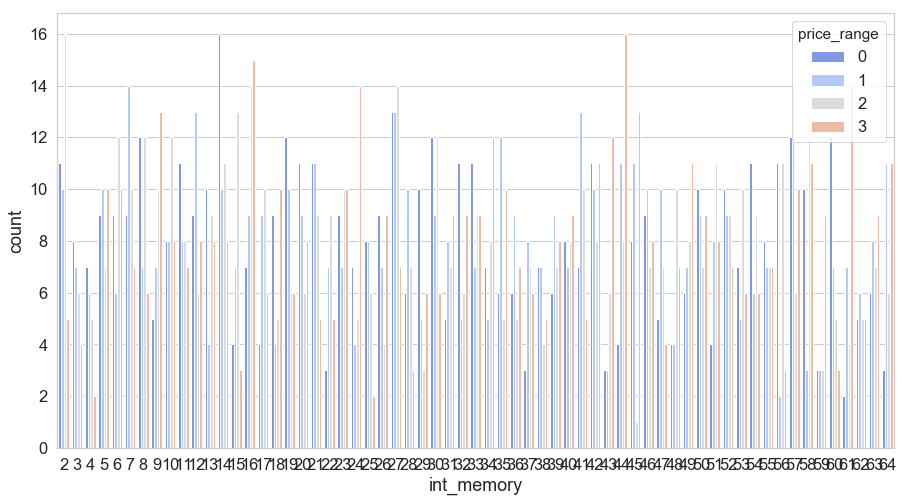

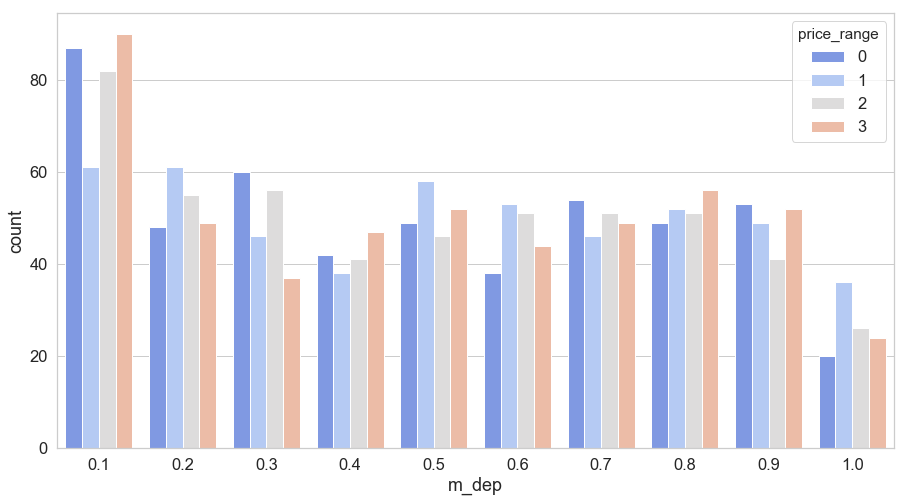

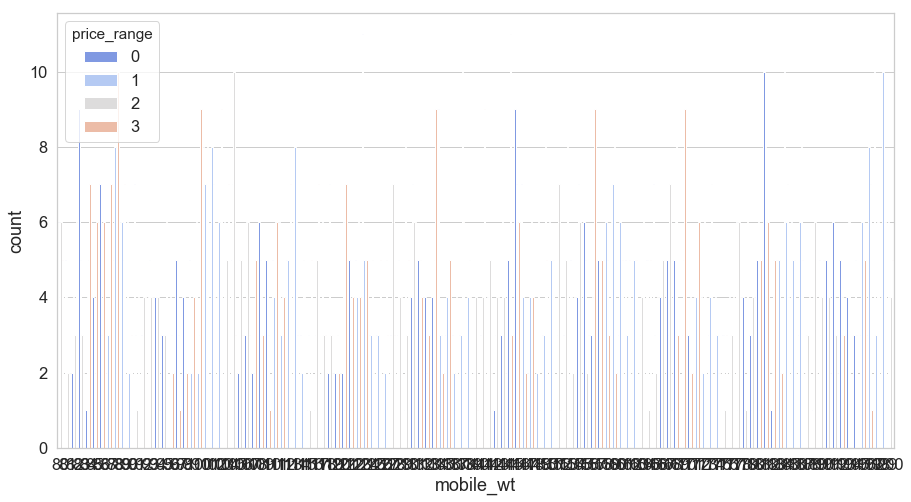

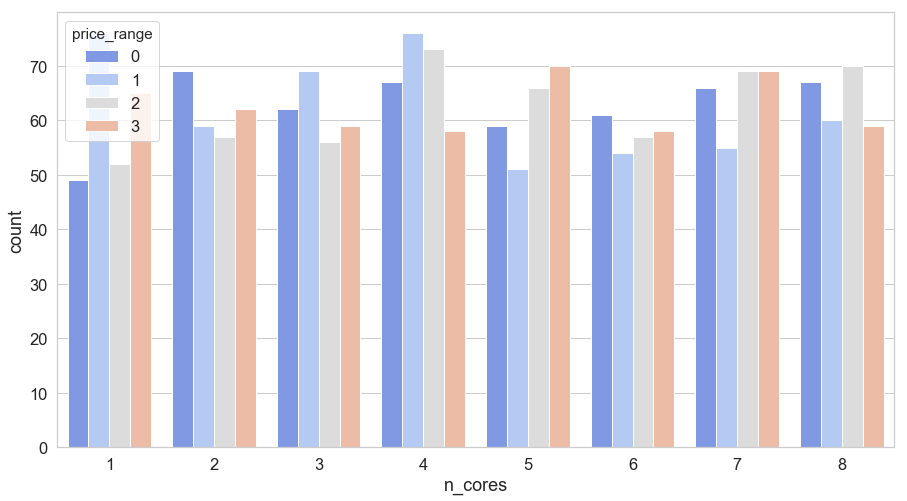

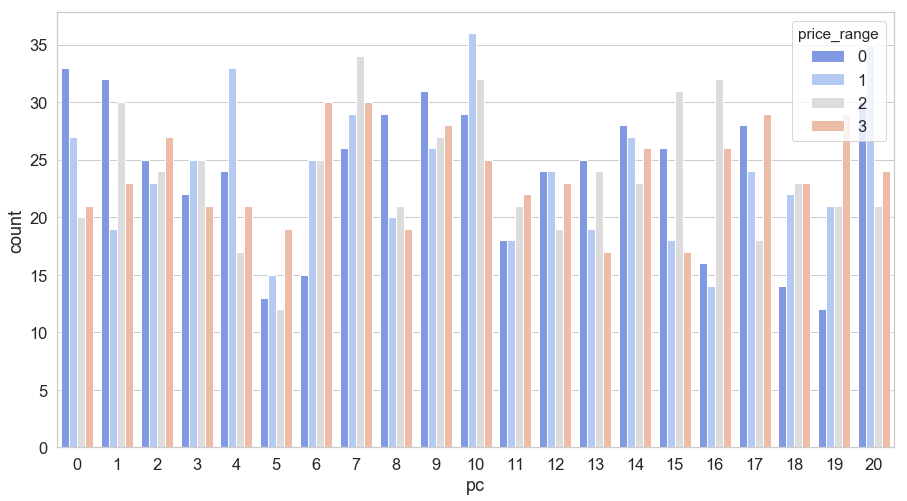

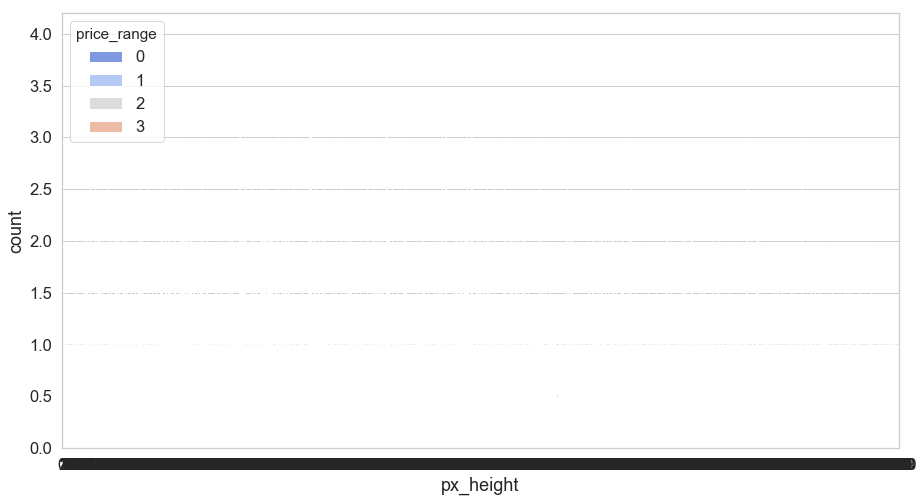

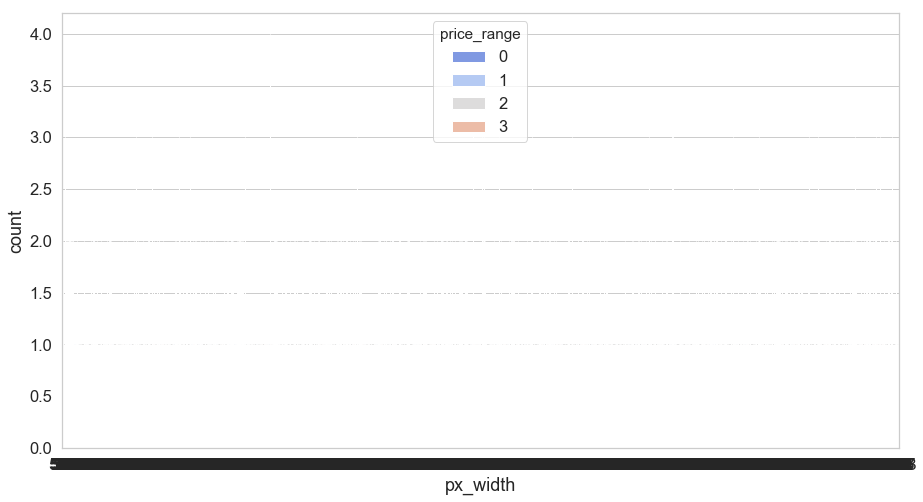

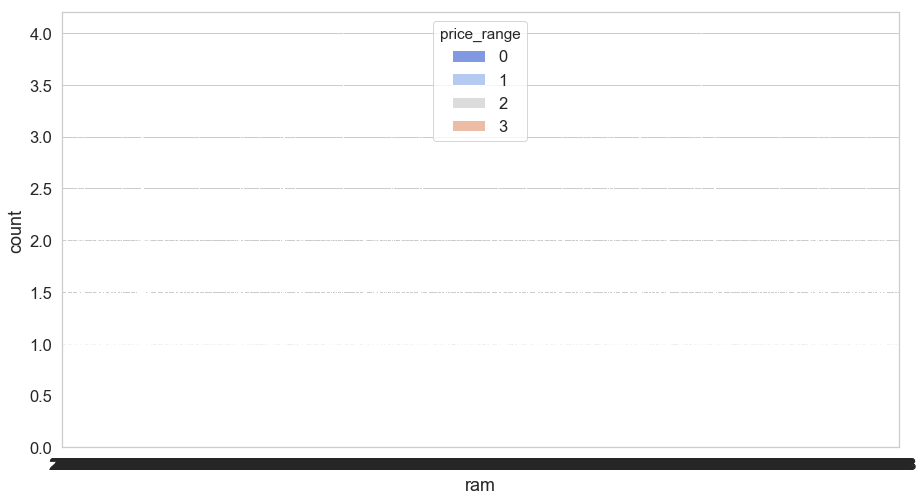

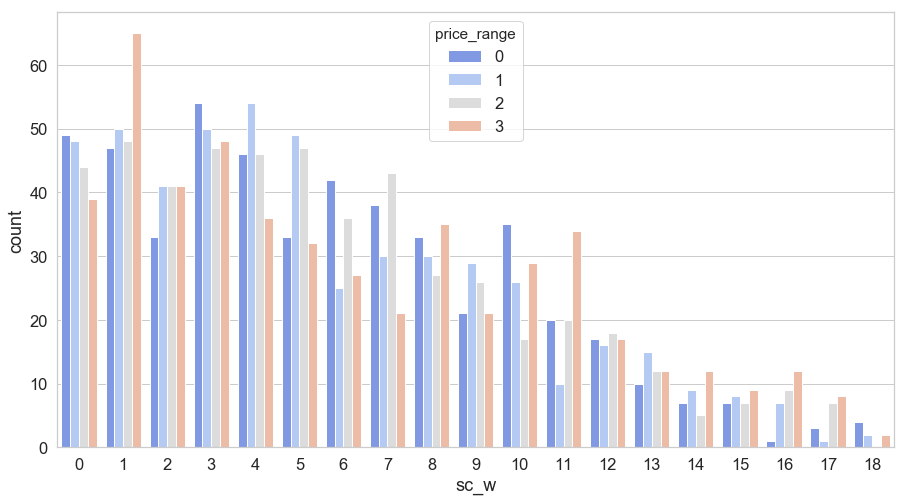

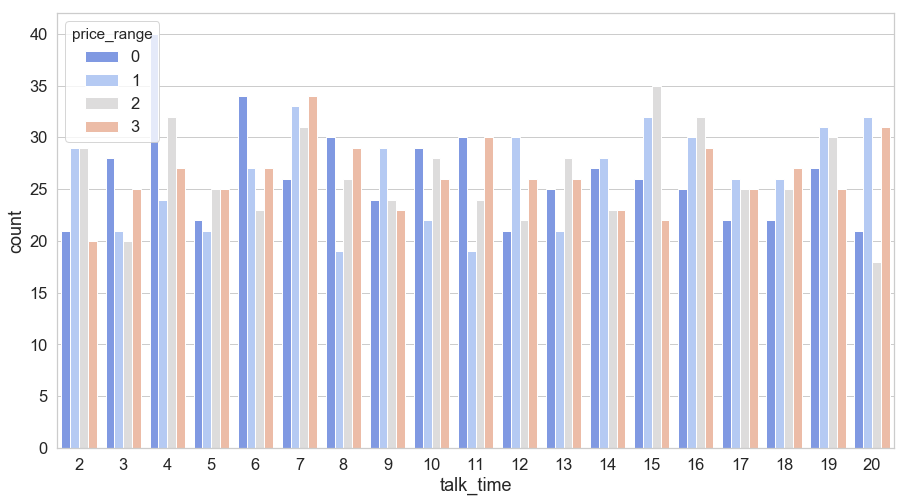

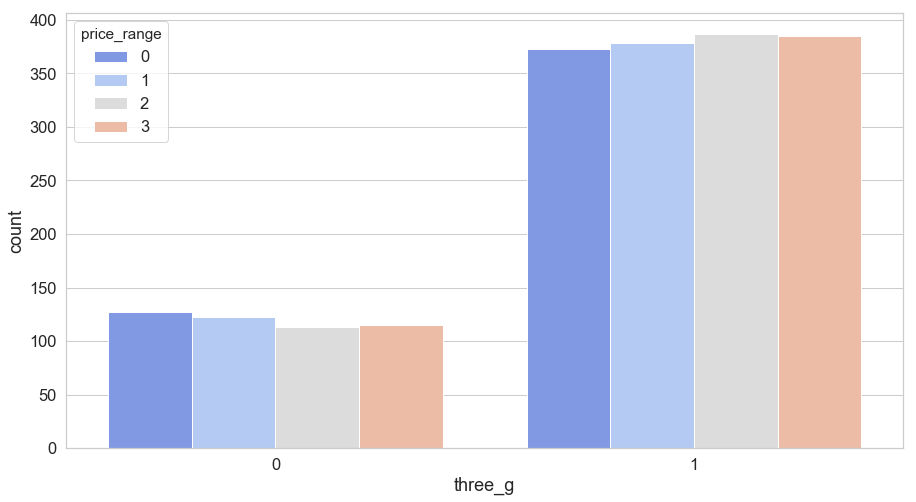

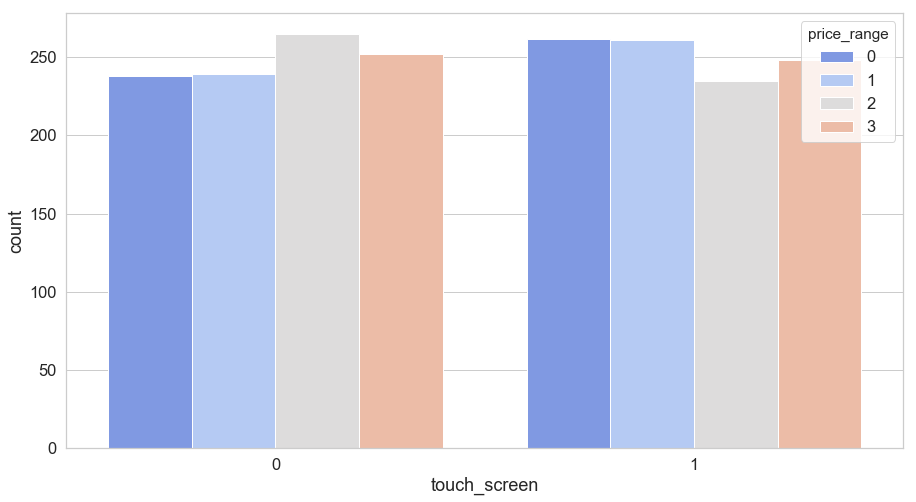

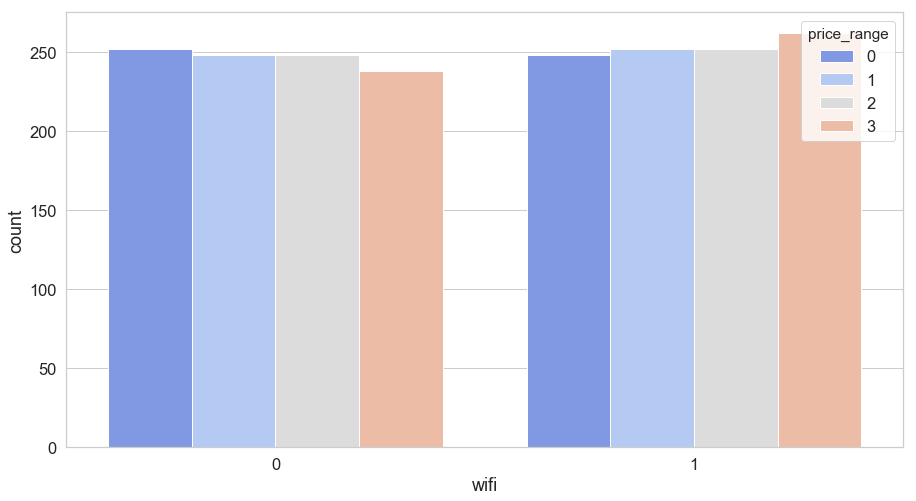

In [29]:
cat_columns = [ 'battery_power',  'blue', 'clock_speed', 'dual_sim', 'fc',
        'four_g',  'int_memory',  'm_dep',  'mobile_wt', 'n_cores', 'pc',
        'px_height',  'px_width',  'ram',  'sc_h',  'sc_w',  'talk_time',
        'three_g',  'touch_screen',  'wifi']

for col in cat_columns: 
    plt.figure(figsize= (15,8))
    sns.countplot(x = col, data = train, hue='price_range', palette=sns.color_palette('coolwarm', n_colors=5))
    plt.show()

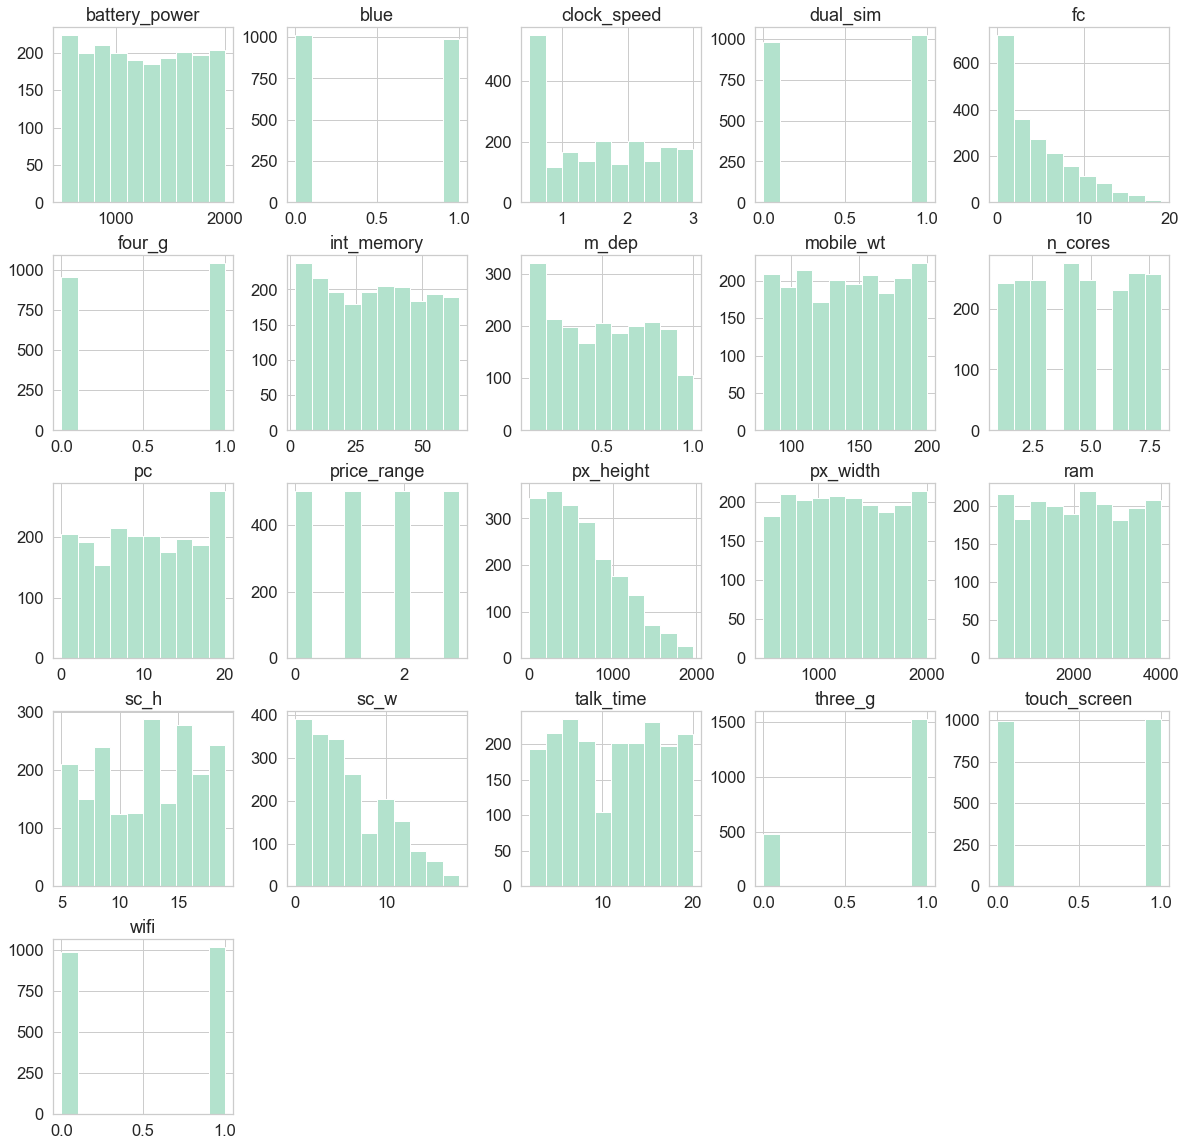

In [30]:
p = train.hist(figsize = (20,20))

#### To show the relation between RAM and price_range 

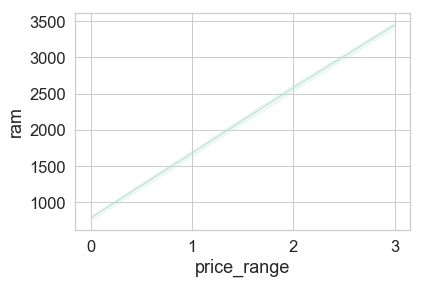

In [31]:
ax = sns.lineplot( 
                  x="price_range", 
                  y="ram",
                  lw=1, 
                  data=train, 
                  palette=sns.color_palette('coolwarm', n_colors=5), 
                  legend="brief")

#### How does ram is affected by price

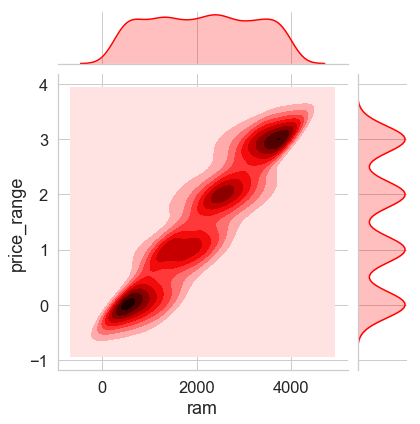

In [79]:
sns.jointplot(x='ram',y='price_range',data=train,color='red',kind='kde');

#### To show the relation between battery_power and price_range 

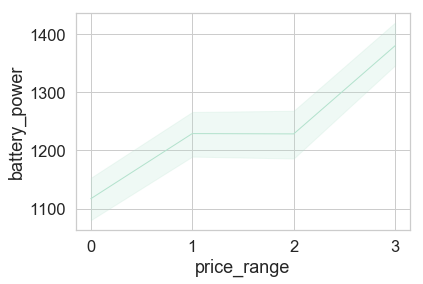

In [32]:
ax = sns.lineplot( 
                  x="price_range", 
                  y="battery_power",
                  lw=1, 
                  data=train, 
                  palette=sns.color_palette('coolwarm', n_colors=5), 
                  legend="brief")

#### To show the relation between three_g and price_range 

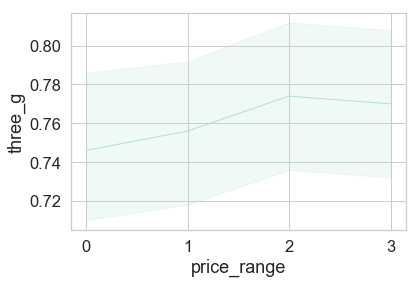

In [33]:
ax = sns.lineplot( 
                  x="price_range", 
                  y="three_g",
                  lw=1, 
                  data=train, 
                  palette=sns.color_palette('coolwarm', n_colors=5), 
                  legend="brief")

# Correlation between different variables

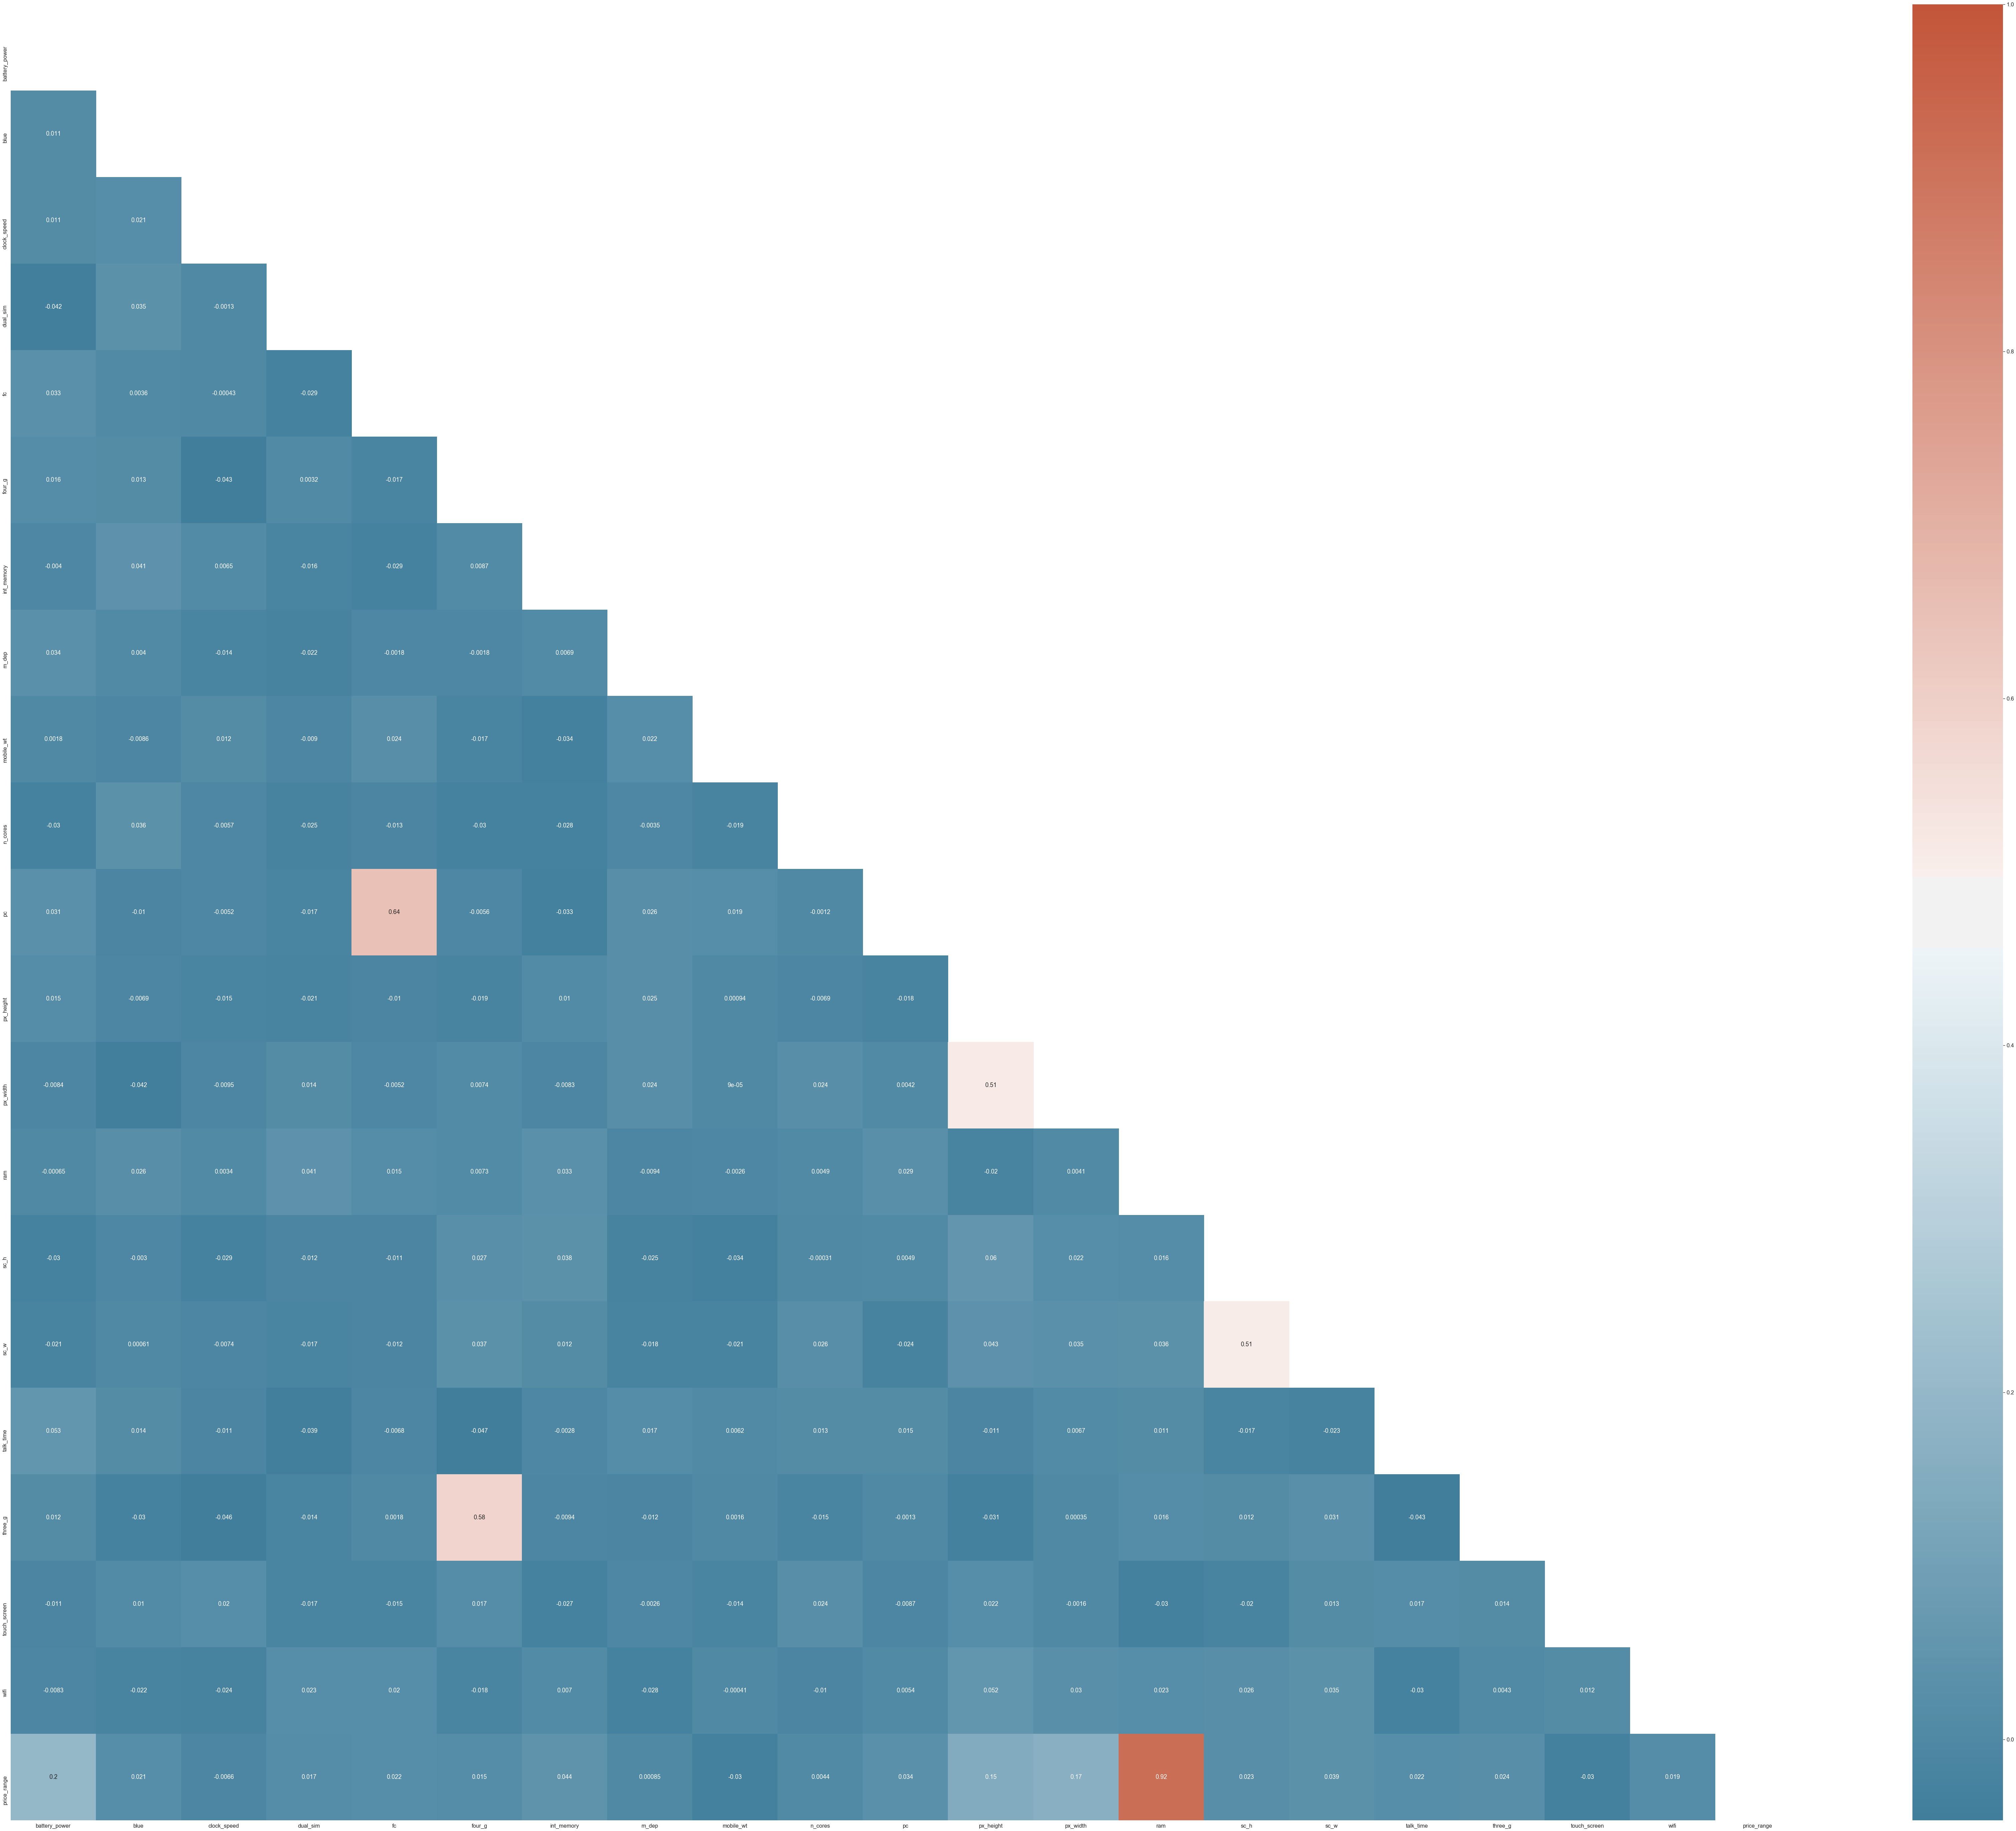

In [34]:
# Correlation between different variables
#
corr = train.corr()
#
# Set up the matplotlib plot configuration
#
f, ax = plt.subplots(figsize=(120, 100))
#
# Generate a mask for upper traingle
#
mask = np.triu(np.ones_like(corr, dtype=bool))
#
# Configure a custom diverging colormap
#
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#
# Draw the heatmap
#
sns.heatmap(corr, annot=True, mask = mask, cmap=cmap)

#### As we can see our target price range has highly positive correlation between ram.
#### Features have highly positive correlation such as:  1- 3G and 4G. 2-  pc(Primary Camera mega pixels) and fc(Front Camera mega pixels). 3- px_weight(Pixel Resolution Width) and px_height(Pixel Resolution Height). 4- sc_w(Screen Width of mobile in cm) and sc_h(Screen Height of mobile in cm).

# Price range correlation

In [71]:
corr.sort_values(by=["price_range"],ascending=False).iloc[0].sort_values(ascending=False)
# As we can see our target Price range and RAM have about 0.91 correlation.

price_range      1.000000
ram              0.917046
battery_power    0.200723
px_width         0.165818
px_height        0.148858
int_memory       0.044435
sc_w             0.038711
pc               0.033599
three_g          0.023611
sc_h             0.022986
fc               0.021998
talk_time        0.021859
blue             0.020573
wifi             0.018785
dual_sim         0.017444
four_g           0.014772
n_cores          0.004399
m_dep            0.000853
clock_speed     -0.006606
mobile_wt       -0.030302
touch_screen    -0.030411
Name: price_range, dtype: float64

# Modeling

## 1. Train/test split
 Split the dataset into two pieces: a training set and a testing set. Train the model on the training set (used to build model), and Test the model on the testing set

In [35]:

X = train.drop(columns = 'price_range')
y = train['price_range']

# STEP 1: split X and y into training and testing sets with random state is 42 & 70% vs 30%
# random state is used if I want to always generate the same random sample 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.3, random_state = 42)
 

In [36]:
# print the shapes of X and y before split
print(X.shape) #2000 row(observation) & 20 column <-- 20 features
print(y.shape) #2000 row (observation) & 1 columns <-- 1 Target 

(2000, 20)
(2000,)


In [37]:
# print the shapes of X after split
print(X_train.shape) #1400 row(observation) & 20 column <-- 20 features
print(X_test.shape) #600 row (observation) &  20 column <-- 20 features

(1400, 20)
(600, 20)


In [38]:
# print the shapes of the new y objects
print(y_train.shape)
print(y_test.shape)

(1400,)
(600,)


## 2. Different Models
### A.Decision Tree

In [39]:

dt_model = DecisionTreeClassifier().fit(X_train,y_train )
dt_y_pred = dt_model.predict(X_test)

#Model Score
print('The Decision Tree model:')
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(metrics.accuracy_score(dt_y_pred, y_test)*100,
                                    recall_score(y_test,dt_y_pred, average='micro')*100 ,
                                   precision_score(y_test,dt_y_pred, average='micro')*100, 
                                  f1_score(y_test,dt_y_pred, average='micro') *100
))   

The Decision Tree model:
The Model Accuracy is 81.67%,      Recall is 81.67%, Percision is 81.67%,       F1-Score is 81.67% 


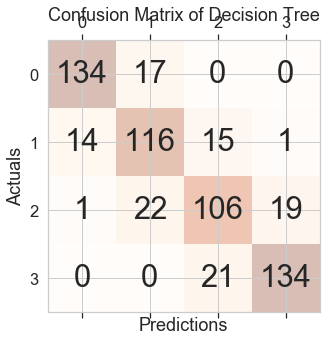

In [40]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix of Decision Tree', fontsize=18)
plt.show()

### B. Bagging

In [41]:

from sklearn.ensemble import BaggingClassifier

bag_model = BaggingClassifier().fit(X_train,y_train)
y_pred = bag_model.predict(X_test)
#print('The Bagging model accuracy score was {}% on test dataset'.format(round(accuracy_score(bag_y_pred, y_test)*100)))

print('The Bagging model model:')

print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(bag_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred, average='micro')*100 ,
                                   f1_score(y_test,y_pred, average='micro')*100 ,
                                   precision_score(y_test,y_pred, average='micro') *100
))

The Bagging model model:
The Model Accuracy is 86.67%,      Recall is 86.67%, Percision is 86.67%,        F1-Score is 86.67% 


### C.Random forest

In [42]:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print('The Random Forest model:')

print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(rf_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred, average='micro')*100 ,
                                   f1_score(y_test,y_pred, average='micro')*100 ,
                                   precision_score(y_test,y_pred, average='micro') *100
))

The Random Forest model:
The Model Accuracy is 88.17%,      Recall is 88.17%, Percision is 88.17%,        F1-Score is 88.17% 


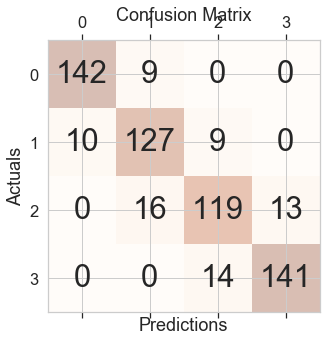

In [43]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### D. KNN classifier
####                                  Search for an optimal value of K for KNN

In [44]:
# Who about creating a loop to check which size for K performs better, where starts from 1 to 30 neighbours
k_range = list(range(1, 30))
k_scores = []
for k in k_range: 
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, #model object
                         X, #features
                         y, #Target
                         cv=10, #Number of Folds
                         scoring='accuracy'#evaluation metric
                        )
    k_scores.append(scores.mean())
print(k_scores)

[0.909, 0.9000000000000001, 0.925, 0.9104999999999999, 0.9235000000000001, 0.9195, 0.9265000000000001, 0.9274999999999999, 0.9280000000000002, 0.929, 0.9335000000000001, 0.9344999999999999, 0.9309999999999998, 0.9325000000000001, 0.9315000000000001, 0.932, 0.9315000000000001, 0.9344999999999999, 0.932, 0.9339999999999999, 0.9340000000000002, 0.932, 0.9315000000000001, 0.932, 0.9294999999999998, 0.9305, 0.931, 0.9295, 0.931]


In [45]:
# To find the best performance 
max(k_scores)*100

93.44999999999999

In [46]:
# To find the the number of Neighbors corresponding to best performance
k_scores.index(max(k_scores))

11

Text(0,0.5,'Cross-Validated Accuracy')

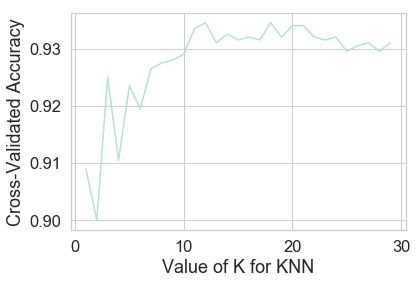

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### KNN classifier where k = 11

In [48]:
# Train KNN classifier where k = 11 on training set, and Test on testing set
#Please note that since it is a classification problem i used KNN Classifier func

KNN_model = KNeighborsClassifier(n_neighbors = 11 )
KNN_model.fit(X_train, y_train)
y_pred = KNN_model.predict(X_test)


print('The K-Neighbors Classifier model:')
print("The Model Accuracy is {:.2f}%, \
      Recall is {:.2f}%, Percision is {:.2f}%,  \
      F1-Score is {:.2f}% ".format(KNN_model.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred, average='micro')*100 ,
                                   f1_score(y_test,y_pred, average='micro')*100 ,
                                   precision_score(y_test,y_pred, average='micro') *100
))

The K-Neighbors Classifier model:
The Model Accuracy is 93.17%,       Recall is 93.17%, Percision is 93.17%,        F1-Score is 93.17% 


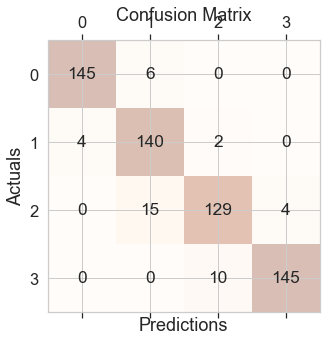

In [49]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### E. Logistic Regression

In [86]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

print('The Logistic Regression model:')
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(lr_model.score(X_test, y_test)*100,
                                    recall_score(y_test,lr_y_pred, average='micro')*100 ,
                                   precision_score(y_test,lr_y_pred, average='micro')*100, 
                                  f1_score(y_test,lr_y_pred, average='micro') *100
))
 

The Logistic Regression model:
The Model Accuracy is 77.50%,      Recall is 77.50%, Percision is 77.50%,       F1-Score is 77.50% 


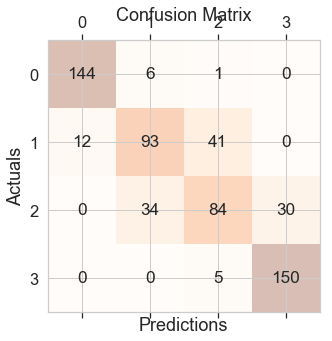

In [51]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=lr_y_pred)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

### F. Naive Bayes classifiers 

In [102]:
# fit model
from sklearn.naive_bayes import GaussianNB
model2=GaussianNB()
model2.fit(X_train,y_train)
y_pred_gnb=model2.predict(X_test)
 
print('The Gaussian NB model:')
print("The Model Accuracy is {:.2f}%,\
      Recall is {:.2f}%, Percision is {:.2f}%, \
      F1-Score is {:.2f}% ".format(model2.score(X_test, y_test)*100,
                                    recall_score(y_test,y_pred_gnb, average='micro')*100 ,
                                   precision_score(y_test,y_pred_gnb, average='micro')*100, 
                                  f1_score(y_test,y_pred_gnb, average='micro') *100
))
 


The Gaussian NB model:
The Model Accuracy is 79.83%,      Recall is 79.83%, Percision is 79.83%,       F1-Score is 79.83% 


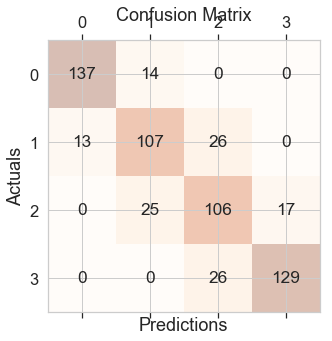

In [104]:
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred_gnb)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Extract important features using RF

In [52]:
importance =  rf_model.feature_importances_
importance_series = pd.Series(importance, index = X_train.columns).sort_values(ascending=False)

Text(25.2,0.5,'Mean decrease ')

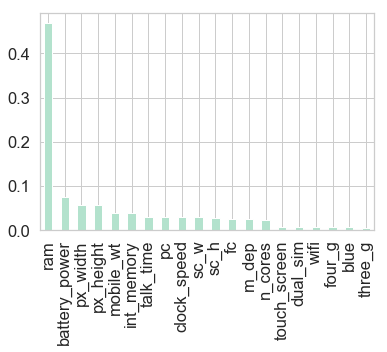

In [53]:
# Let draw the features vs Importance 
importance_series.plot.bar()
ax.set_title("Feature importances ")
ax.set_ylabel("Mean decrease ")

In [54]:
importance_series.shape

(20,)

# Price prediction of Test.csv Using KNN for Prediction


## Read test set

In [55]:
# Import test.csv 
data_test=pd.read_csv('./test.csv')

In [56]:
data_test.head()

id  battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0   1           1043     1          1.8         1  14       0           5   
1   2            841     1          0.5         1   4       1          61   
2   3           1807     1          2.8         0   1       0          27   
3   4           1546     0          0.5         1  18       1          25   
4   5           1434     0          1.4         0  11       1          49   

   m_dep  mobile_wt  ...  pc  px_height  px_width   ram  sc_h  sc_w  \
0    0.1        193  ...  16        226      1412  3476    12     7   
1    0.8        191  ...  12        746       857  3895     6     0   
2    0.9        186  ...   4       1270      1366  2396    17    10   
3    0.5         96  ...  20        295      1752  3893    10     0   
4    0.5        108  ...  18        749       810  1773    15     8   

   talk_time  three_g  touch_screen  wifi  
0          2        0             1     0  
1          7        1             0     0  
2         10        0             1     1  
3          7        1             1     0  
4          7        1             0     1  

[5 rows x 21 columns]

In [64]:
data_test=data_test.drop('id',axis=1)

## Predicted Price Range

In [106]:
data_test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  ...        226      1412  3476    12     7          2   
1        191        5  ...        746       857  3895     6     0          7   
2        186        3  ...       1270      1366  2396    17    10         10   
3         96        8  ...        295      1752  3893    10     0          7   
4        108        6  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1  

[5 rows x 21 columns]

In [66]:
predicted_price= KNN_model.predict(data_test)

## Adding Predicted price to test.csv

In [69]:
data_test['price_range']=predicted_price
data_test.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1043     1          1.8         1  14       0           5    0.1   
1            841     1          0.5         1   4       1          61    0.8   
2           1807     1          2.8         0   1       0          27    0.9   
3           1546     0          0.5         1  18       1          25    0.5   
4           1434     0          1.4         0  11       1          49    0.5   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        193        3  ...        226      1412  3476    12     7          2   
1        191        5  ...        746       857  3895     6     0          7   
2        186        3  ...       1270      1366  2396    17    10         10   
3         96        8  ...        295      1752  3893    10     0          7   
4        108        6  ...        749       810  1773    15     8          7   

   three_g  touch_screen  wifi  price_range  
0        0             1     0            3  
1        1             0     0            3  
2        0             1     1            2  
3        1             1     0            3  
4        1             0     1            1  

[5 rows x 21 columns]

# Conclusion
### Through the next table, we note that the best model is KNeighbors Classifier

In [107]:
# import module
from tabulate import tabulate
  
# assign data
mydata = [{ "Decision Tree"," 81.17%"}, 
          { "RandomForest","87.83%"}, 
          {"KNeighbors Classifier", "93.17%"}, 
          {"Logistic Regression", "78.50%"},
          {"Bagging", "81.17%"},
           {"Naive Bayes classifiers ", "79.83%"}
         ]
  
# create header
head = ["Accuracy", " Model"]
  
# display table
print(tabulate(mydata, headers=head, tablefmt="grid"))

+--------------+-------------------------+
| Accuracy     |  Model                  |
+==============+=========================+
| 81.17%       | Decision Tree           |
+--------------+-------------------------+
| RandomForest | 87.83%                  |
+--------------+-------------------------+
| 93.17%       | KNeighbors Classifier   |
+--------------+-------------------------+
| 78.50%       | Logistic Regression     |
+--------------+-------------------------+
| Bagging      | 81.17%                  |
+--------------+-------------------------+
| 79.83%       | Naive Bayes classifiers |
+--------------+-------------------------+
